In [1]:
import tensorflow as tf
import keras
print(f'Tensorflow version is {tf.__version__}')
print(f'Keras version is {keras.__version__}')

Tensorflow version is 2.12.0
Keras version is 2.12.0


In [2]:
import pandas as pd
df=pd.read_csv('wine.csv')
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [6]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

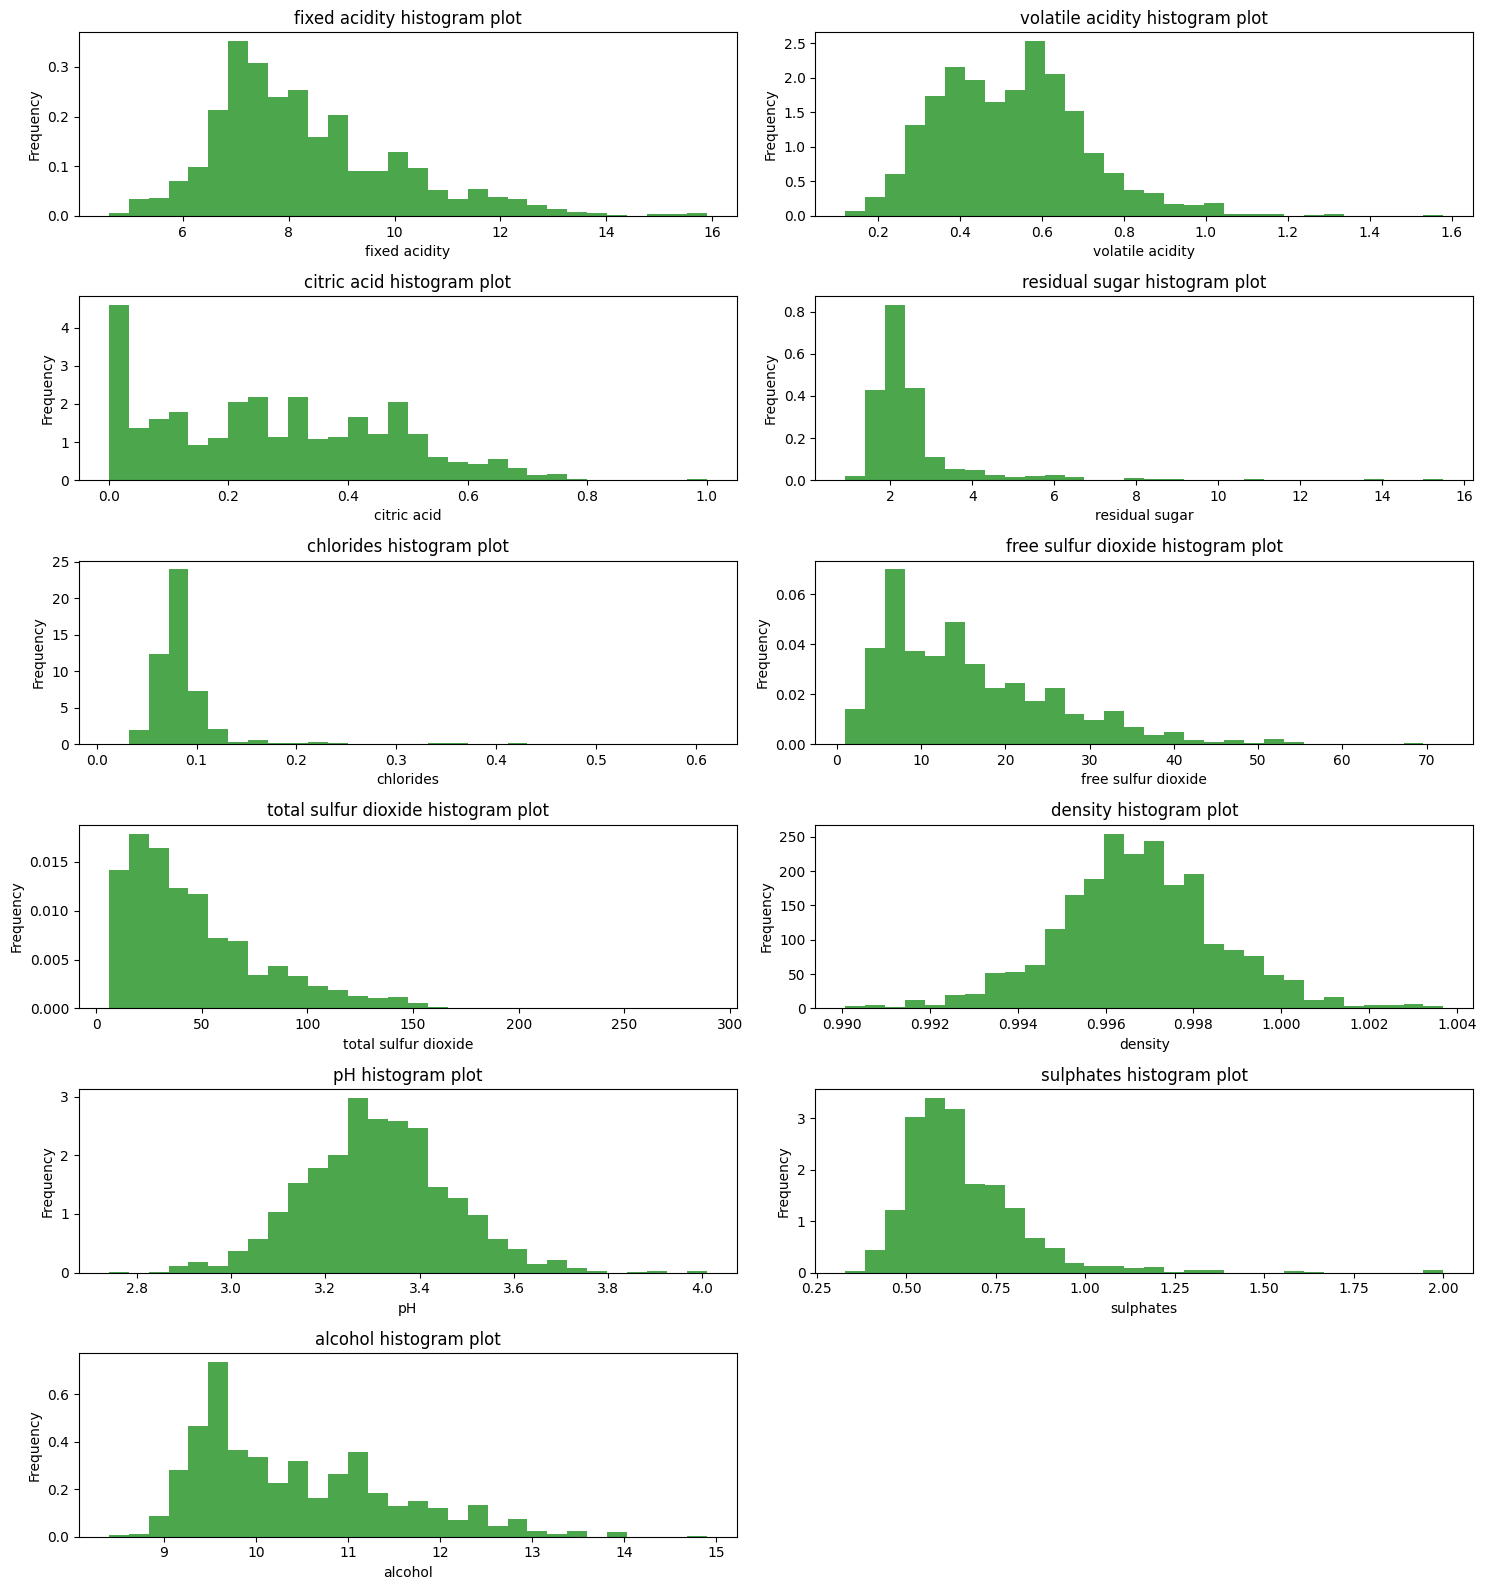

In [7]:
import matplotlib.pyplot as plt
cols=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
num_bins=30
plt.figure(figsize=(15, 16))
for i, col in enumerate(cols, start=1):
    plt.subplot(6, 2, i)
    plt.hist(df[col], num_bins, density=1, color='green', alpha=0.7)
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'{col} histogram plot')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df['quality']=LabelEncoder.fit_transform(df['quality'])
df['quality'].unique()

array([0, 1])

In [9]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X,y=df.drop('quality',axis=1),df['quality']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

X_train.shape,X_test.shape,X_valid.shape

((1023, 11), (320, 11), (256, 11))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
layersBN = [
    tf.keras.layers.Flatten(input_shape=(11,), name='InputLayer'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu', name='HiddenLayer1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', name='HiddenLayer2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='tanh', name='OutputLayer')
]

model_BN = tf.keras.models.Sequential(layersBN)
model_BN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 11)                0         
                                                                 
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               3600      
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)              4

In [12]:
X_train.shape

(1023, 11)

Epoch 1/15
32/32 - 4s - loss: 3.9036 - accuracy: 0.6383 - 4s/epoch - 113ms/step
Epoch 2/15
32/32 - 0s - loss: 3.0552 - accuracy: 0.6960 - 76ms/epoch - 2ms/step
Epoch 3/15
32/32 - 0s - loss: 2.5076 - accuracy: 0.7361 - 88ms/epoch - 3ms/step
Epoch 4/15
32/32 - 0s - loss: 2.1612 - accuracy: 0.7351 - 111ms/epoch - 3ms/step
Epoch 5/15
32/32 - 0s - loss: 2.0696 - accuracy: 0.7419 - 139ms/epoch - 4ms/step
Epoch 6/15
32/32 - 0s - loss: 2.1516 - accuracy: 0.7517 - 140ms/epoch - 4ms/step
Epoch 7/15
32/32 - 0s - loss: 2.3486 - accuracy: 0.7429 - 103ms/epoch - 3ms/step
Epoch 8/15
32/32 - 0s - loss: 1.9457 - accuracy: 0.7449 - 97ms/epoch - 3ms/step
Epoch 9/15
32/32 - 0s - loss: 1.9247 - accuracy: 0.7351 - 98ms/epoch - 3ms/step
Epoch 10/15
32/32 - 0s - loss: 2.1323 - accuracy: 0.6970 - 98ms/epoch - 3ms/step
Epoch 11/15
32/32 - 0s - loss: 2.0795 - accuracy: 0.6784 - 114ms/epoch - 4ms/step
Epoch 12/15
32/32 - 0s - loss: 1.7608 - accuracy: 0.7224 - 116ms/epoch - 4ms/step
Epoch 13/15
32/32 - 0s - loss: 

<AxesSubplot: >

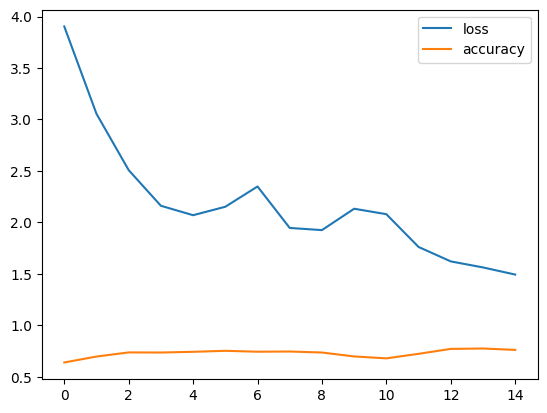

In [13]:
model_BN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=model_BN.fit(X_train,y_train,batch_size=32,epochs=15,verbose=2)
result=pd.DataFrame(history.history)
result.plot()

In [14]:
test_loss, test_accuracy = model_BN.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 1s 3ms/step - loss: 1.4303 - accuracy: 0.7437
Test Loss: 1.4303135871887207
Test Accuracy: 0.7437499761581421
